<a href="https://colab.research.google.com/github/AkangkhaMitra/GoldPricePrediction/blob/main/GoldPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment**



**Time Series Data Set**

#**1.Select a time series dataset**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CleanedData.xlsx to CleanedData.xlsx


In [ ]:
import io


In [ ]:
df = pd.read_excel('CleanedData.xlsx')
df = df.set_index('Date')
df


,Open,High,Low,Close,Change(Pips),Change(%)
Date,,,,,,
2021-07-04,1787.22,1787.73,1785.00,1786.39,-83,-0.05
2021-07-05,1786.68,1794.00,1783.80,1791.15,447,0.25
2021-07-06,1790.85,1814.89,1789.89,1795.68,483,0.27
2021-07-07,1795.28,1809.50,1793.41,1803.22,794,0.44
2021-07-08,1803.29,1818.00,1793.90,1803.75,46,0.03
...,...,...,...,...,...,...
2023-06-29,1909.47,1913.00,1893.16,1908.76,-71,-0.04
2023-06-30,1908.71,1922.61,1900.57,1919.20,1049,0.55
2023-07-02,1920.30,1920.30,1917.50,1917.70,-260,-0.14


#**2.Study the various characteristics of the data in terms of mean, median, variance, standard deviation.**

In [ ]:
df.isna().sum()

Open            0
High            0
Low             0
Close           0
Change(Pips)    0
Change(%)       0
dtype: int64

**Describing Mean ,Median,Standard Deviation**

In [ ]:
df.describe()

,Open,High,Low,Close,Change(Pips),Change(%)
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,1833.470354,1844.208939,1822.538248,1833.592749,12.239550,0.003617
std,94.417731,95.163303,93.223079,94.345885,1480.617616,0.804528
min,1627.270000,1640.760000,1615.040000,1626.890000,-5559.000000,-3.050000
25%,1775.080000,1787.085000,1765.435000,1774.957500,-704.000000,-0.380000
50%,1815.230000,1826.375000,1808.335000,1815.470000,11.500000,0.005000
75%,1913.792500,1924.717500,1896.670000,1914.700000,749.500000,0.410000
max,2052.780000,2071.320000,2030.770000,2051.930000,6612.000000,3.330000


**Variance**

In [ ]:
variance_value_open = np.var(df['Open'])

variance_value_High	 = np.var(df['High'])

variance_value_Low	 = np.var(df['Low'])

print(variance_value_open)
print(variance_value_High)
print(variance_value_Low)

8900.375574151425
9041.494579581477
8676.570585835805


**3.Study the patterns of the data**

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

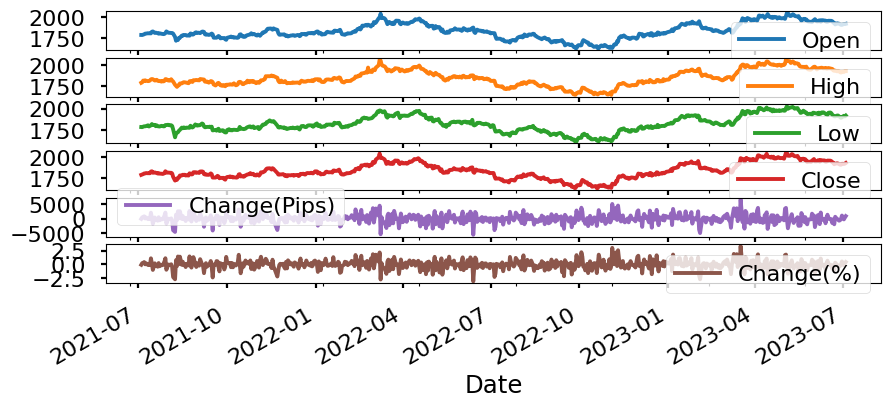

In [ ]:
df.plot(subplots=True, figsize=(10, 4))

In [ ]:
df_weekly = df.resample('W').mean()
df_weekly

,Open,High,Low,Close,Change(Pips),Change(%)
Date,,,,,,
2021-07-04,1787.220000,1787.730000,1785.000000,1786.390000,-83.000000,-0.050000
2021-07-11,1798.005000,1809.525000,1793.838333,1801.321667,331.666667,0.185000
2021-07-18,1814.511667,1822.751667,1805.850000,1815.956667,144.500000,0.075000
2021-07-25,1807.855000,1812.781667,1796.275000,1805.295000,-256.000000,-0.141667
2021-08-01,1808.361667,1817.550000,1802.123333,1810.498333,213.666667,0.116667
...,...,...,...,...,...,...
2023-06-11,1957.770000,1967.458333,1948.130000,1959.080000,131.000000,0.065000
2023-06-18,1954.123333,1964.213333,1944.143333,1953.616667,-50.666667,-0.026667
2023-06-25,1936.828333,1941.996667,1923.350000,1930.611667,-621.666667,-0.321667


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

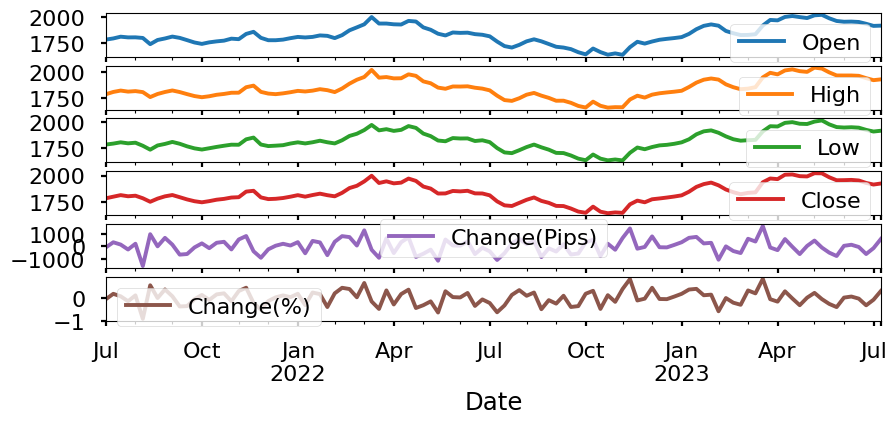

In [ ]:
df_weekly.plot(subplots=True,figsize=(10, 4))

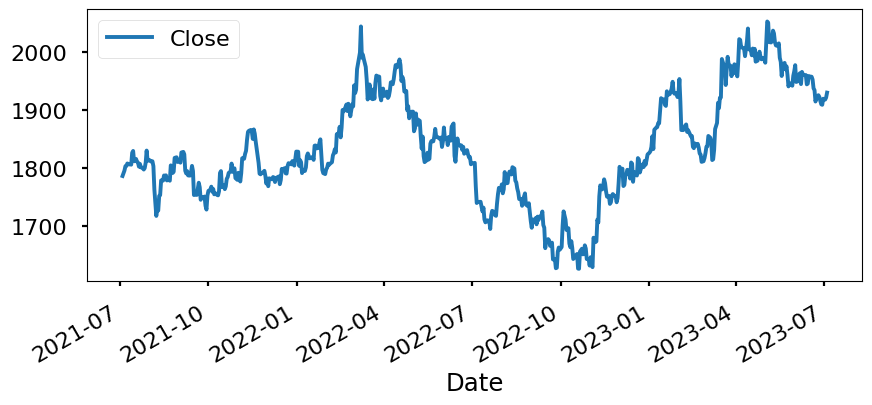

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
df.plot(y='Close', kind='line',ax=ax, figsize=(10, 4))
plt.show()

**Trend Analysis and Seasonality**

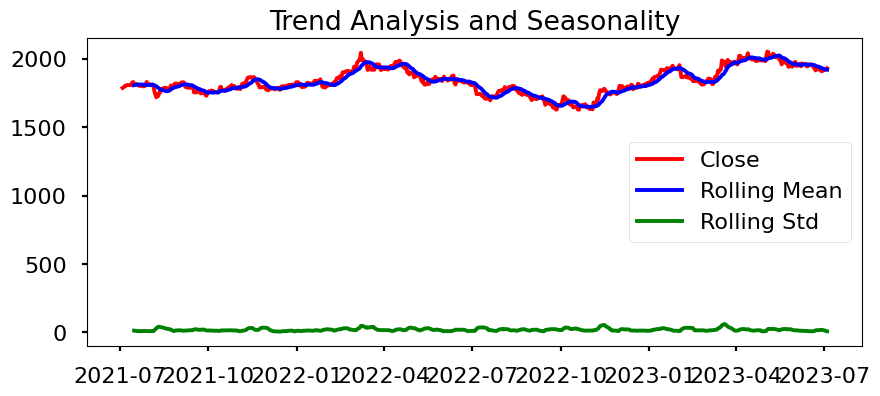

In [ ]:
# Rolling Statistics
rolling_mean = df['Close'].rolling(window=12).mean()
rolling_std = df['Close'].rolling(window=12).std()

plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Close'], label='Close', color='red')
plt.plot(df.index, rolling_mean, label='Rolling Mean', color='blue')
plt.plot(df.index, rolling_std, label='Rolling Std', color='green')
plt.legend()
plt.title('Trend Analysis and Seasonality')
plt.show()


#**Select the model**

**4.Decide the model: ARMA or ARIMA. Proper justification is required with evidences regarding
the selection of the model.**

The use of the ARIMA (AutoRegressive Integrated Moving Average) model in gold price prediction, or any time series dataset, is based on its ability to capture and model various components of time series data, including trends, seasonality, and autocorrelation. Here are some justifications for using the ARIMA model in the context of gold price prediction:



**1.Capturing Trends (AutoRegressive - AR):**
ARIMA includes an autoregressive (AR) component that captures the relationship between the current value and its past values. In the context of gold prices, historical prices often exhibit trends. The AR component helps capture and model these trends, allowing the model to account for the impact of past prices on the current price.


**2.Handling Stationarity (Integrated - I):**
Gold prices and many financial time series data often exhibit non-stationarity, where statistical properties change over time. The integrated (I) component of ARIMA involves differencing the time series data to make it stationary. Stationarity is crucial for the model to be effective, as it simplifies the patterns in the data and makes predictions more reliable.


**3.Smoothing Fluctuations (Moving Average - MA):**
The moving average (MA) component of ARIMA helps smooth out short-term fluctuations in the time series data. In the context of gold prices, which may experience daily or weekly fluctuations, the MA component can help filter out noise and capture the underlying patterns that are more indicative of the overall trend.
**4.Seasonality Consideration:**
While the basic ARIMA model is effective for capturing trends and handling non-stationarity, it may not be well-suited for time series data with strong seasonal patterns. In such cases, an extended version called Seasonal ARIMA (SARIMA) can be used, which incorporates additional seasonal components to account for repeating patterns over specific time intervals.


**5.Model Interpretability:**
ARIMA models are relatively interpretable, making it easier to understand the impact of past observations on future predictions. This interpretability can be valuable in financial contexts where stakeholders may need to understand the reasoning behind predictions.


**6.Historical Dependency:**
The gold market often exhibits a degree of historical dependency, where past prices influence future prices. ARIMA, by considering lagged observations in the autoregressive component, is well-suited for capturing this type of dependency.




It's important to note that while ARIMA is a powerful and widely used model for time series forecasting, the choice of model should also depend on the specific characteristics of the data. Additionally, more advanced models like SARIMA, machine learning models, or deep learning approaches may be considered based on the complexity and nature of the gold price data. Model selection should involve a careful evaluation of performance metrics and consideration of the assumptions underlying the chosen model.


In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series,name):

    result = adfuller(series.values)
    print(f'\n    Augmented Dickey-Fuller Test on {name}', "\n   ", '-'*40)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32m    Stationary\u001b[0m")
    else:
        print("\x1b[31m    Non-stationary\x1b[0m")
    print('    ','-'*40)

In [ ]:
for column in df.columns:
    check_stationarity(df[column],name=column)


    Augmented Dickey-Fuller Test on Open 
    ----------------------------------------
ADF Statistic: -1.875612
p-value: 0.343619
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569
    Non-stationary
     ----------------------------------------

    Augmented Dickey-Fuller Test on High 
    ----------------------------------------
ADF Statistic: -1.755431
p-value: 0.402802
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569
    Non-stationary
     ----------------------------------------

    Augmented Dickey-Fuller Test on Low 
    ----------------------------------------
ADF Statistic: -2.008755
p-value: 0.282747
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569
    Non-stationary
     ----------------------------------------

    Augmented Dickey-Fuller Test on Close 
    ----------------------------------------
ADF Statistic: -1.851243
p-value: 0.355334
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569
    Non-stationary
     ----------------------------------------


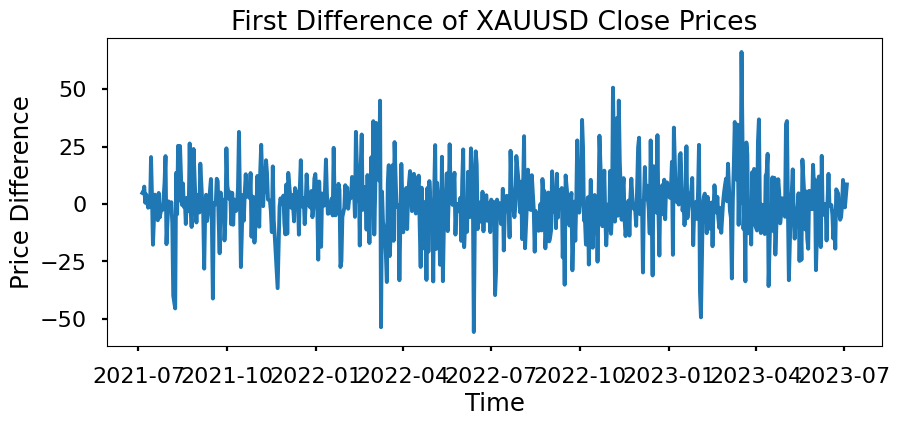

In [ ]:
# Plot the first difference of the data
diff = df['Close'].diff().dropna()
plt.figure(figsize=(10, 4))
plt.plot(diff)
plt.title('First Difference of XAUUSD Close Prices')
plt.xlabel('Time')
plt.ylabel('Price Difference')
plt.show()

In [ ]:
check_stationarity(diff,name='D=1 Close')


    Augmented Dickey-Fuller Test on D=1 Close 
    ----------------------------------------
ADF Statistic: -19.116334
p-value: 0.000000
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569
    Stationary
     ----------------------------------------


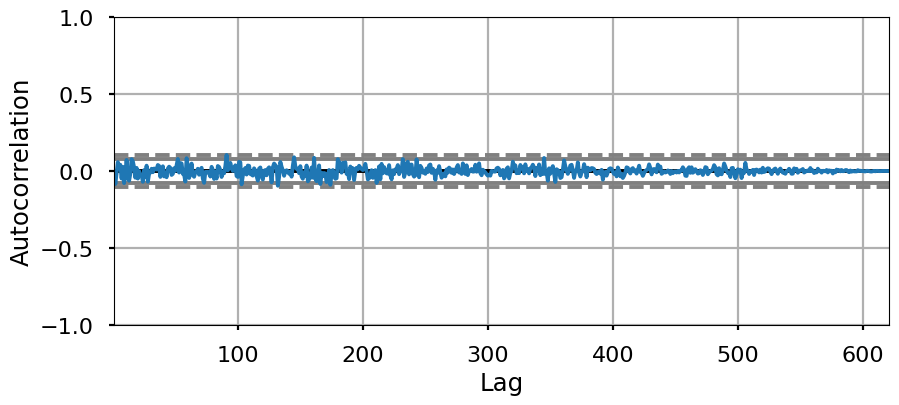

In [ ]:
# autocorrelation plot
# by default this method uses a 95% significance threshold for the autocorrelation plot (1.96 sigma)
plt.figure(figsize=(10, 4))
pd.plotting.autocorrelation_plot(diff)
plt.show()

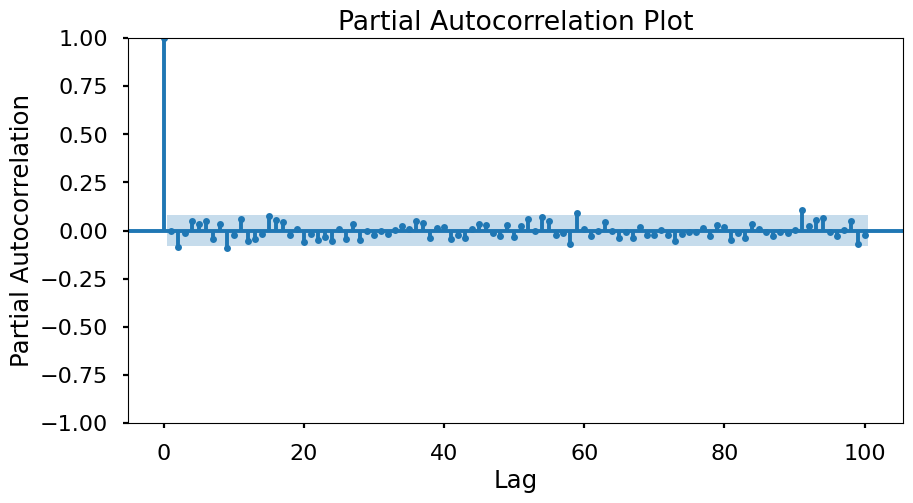

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

# Create the PACF plot for df['Close']
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(diff, ax=ax, lags=100)
ax.set(title='Partial Autocorrelation Plot', xlabel='Lag', ylabel='Partial Autocorrelation')
plt.show()

#**Fitting the model**

#**Train-test data splition**

In [ ]:
# Split the data into training and testing sets
train_size = 0.8  # 80% of the data will be used for training
split_index = int(len(df) * train_size)
train_data = df['Close'][:split_index]
test_data = df['Close'][split_index:]

# Print the number of observations in each set
print('Number of observations in training set:', len(train_data))
print('Number of observations in testing set:', len(test_data))

Number of observations in training set: 497
Number of observations in testing set: 125


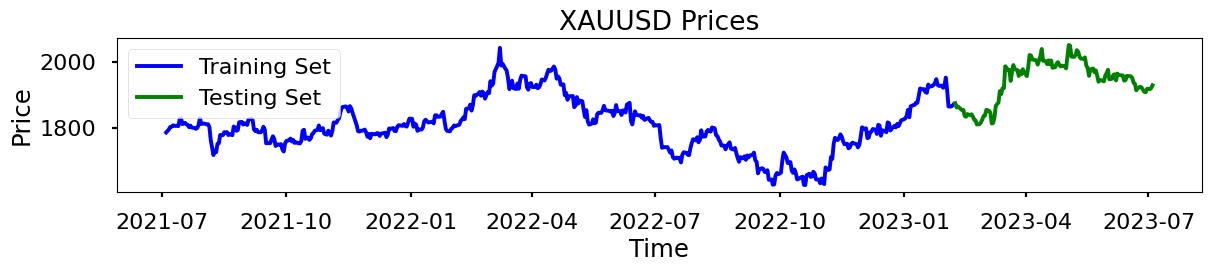

In [ ]:
# Plot the training and testing sets
fig, ax = plt.subplots(figsize=(14, 2))
plt.plot(train_data, color='blue', label='Training Set')
plt.plot(test_data, color='green', label='Testing Set')
plt.title('XAUUSD Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show(ax)


#**Predicting the best hyperparameters**

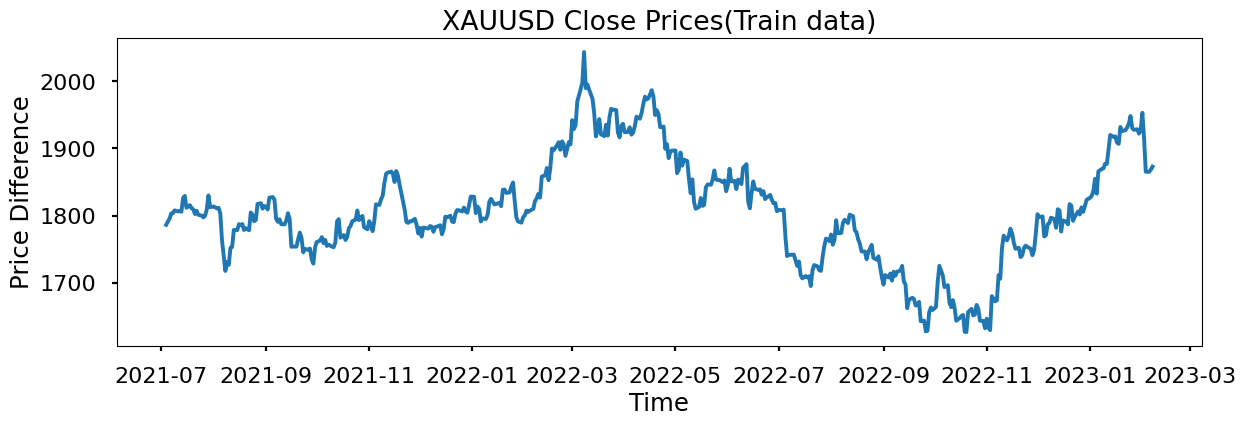

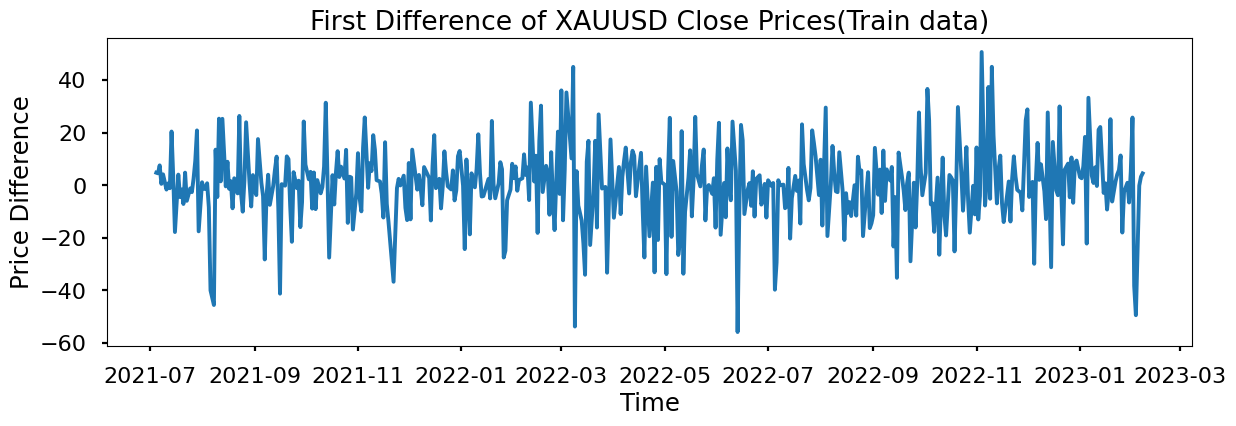

In [ ]:
#plot the train data
fig, ax = plt.subplots(figsize=(14, 4))
plt.plot(train_data)
plt.title('XAUUSD Close Prices(Train data)')
plt.xlabel('Time')
plt.ylabel('Price Difference')
plt.show(ax)

# Plot the first difference of the train data
fig, ax = plt.subplots(figsize=(14, 4))
diff_train =train_data.diff().dropna()
plt.plot(diff_train)
plt.title('First Difference of XAUUSD Close Prices(Train data)')
plt.xlabel('Time')
plt.ylabel('Price Difference')
plt.show(ax)


In [ ]:
#determinig d
check_stationarity(train_data,name='Close(train)')
check_stationarity(diff_train,name='D=1 Close(train)')


    Augmented Dickey-Fuller Test on Close(train) 
    ----------------------------------------
ADF Statistic: -1.908185
p-value: 0.328221
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570
    Non-stationary
     ----------------------------------------

    Augmented Dickey-Fuller Test on D=1 Close(train) 
    ----------------------------------------
ADF Statistic: -12.721794
p-value: 0.000000
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570
    Stationary
     ----------------------------------------


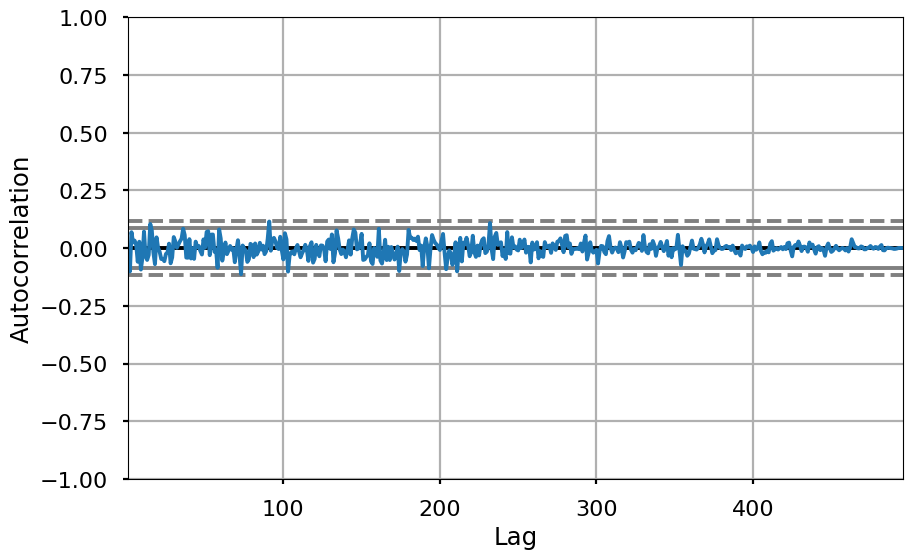

In [ ]:
# autocorrelation plot
# by default this method uses a 95% significance threshold for the autocorrelation plot (1.96 sigma)
fig, ax = plt.subplots(figsize=(10, 6))
pd.plotting.autocorrelation_plot(diff_train)
plt.show(ax)

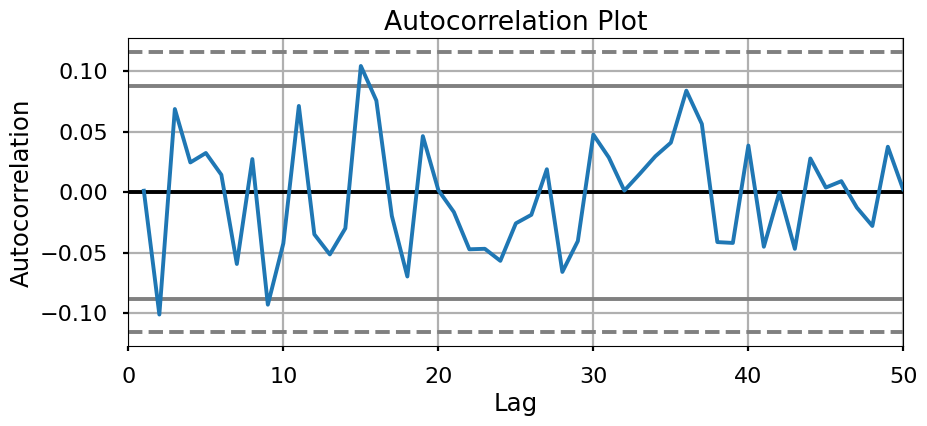

In [ ]:
# Create the autocorrelation plot for diff_train with only the first 50 lags
fig, ax = plt.subplots(figsize=(10, 4))
pd.plotting.autocorrelation_plot(diff_train, ax=ax)
ax.set(title='Autocorrelation Plot', xlabel='Lag', ylabel='Autocorrelation', xlim=(0, 50))
plt.show()

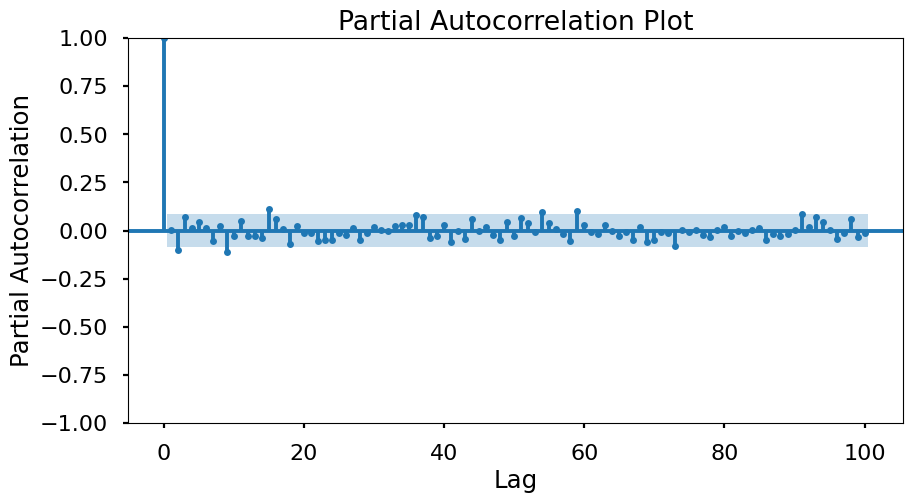

In [ ]:
# Create the PACF plot
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(diff_train, ax=ax, lags=100)
ax.set(title='Partial Autocorrelation Plot', xlabel='Lag', ylabel='Partial Autocorrelation')
plt.show()

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.4 MB/s eta 0:00:00


#**Decide the order of the model**

The ARIMA(0,1,3)(0,0,0)[0] model order notation indicates an ARIMA model with the following parameters:

*   p (AR order) = 0
*   d (Differencing order) = 1
*   q (MA order) = 3
*   P (Seasonal AR order) = 0
*   D (Seasonal differencing order) = 0
*   Q (Seasonal MA order) = 0
*   s (Seasonal period) = 0
*   Intercepts are included









 Justification for each of these parameters:

**1.  Differencing Order (d):**The '1' in ARIMA(0,1,3) indicates that one order of differencing is applied to make the time series stationary. This is based on the Augmented Dickey-Fuller (ADF) test, where differencing the series once results in stationarity.




**2.   Moving Average Order (q):**The '3' in ARIMA(0,1,3) suggests that there are three lagged observations of the forecast errors (residuals) included in the model. This is determined by examining the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots. A significant autocorrelation at lag 1 and the presence of a slow decay in the ACF plot may indicate the need for a moving average component.


**3.   AR Order (p):**The '0' in ARIMA(0,1,3) indicates that there is no autoregressive component in the model. The decision to exclude autoregressive terms may be based on the lack of significant autocorrelation in the PACF plot.

**4.   Seasonal Orders (P, D, Q, s):**The seasonal orders (P, D, Q, s) are set to 0 since there is no evidence of seasonality in the data. If seasonality were present, these values might be chosen based on the seasonal patterns observed in the ACF and PACF plots.

**5.  Intercept:**The inclusion of an intercept suggests that a constant term is added to the model. This is often necessary to capture the overall level of the time series.

**6.   Model Fitting and Diagnostics:**The specific order (0,1,3)(0,0,0)[0] is likely chosen based on the minimization of an information criterion such as the Akaike Information Criterion (AIC) or Bayesian Information Criterion (BIC). This involves fitting various ARIMA models and selecting the one with the lowest AIC or BIC.

**7.    Residual Analysis:**After fitting the model, it's important to conduct residual analysis to ensure that the residuals are approximately white noise. This can be done through Q-Q plots, residual ACF/PACF plots, and statistical tests.

**8.    Out-of-Sample Performance:**Finally, the model should be evaluated on out-of-sample data to assess its predictive performance.

The justification for this specific ARIMA order is based on a combination of statistical analysis, model fitting procedures, and considerations of the time series characteristics. It's important to note that model selection involves some level of trial and error, and alternative specifications should be explored to ensure robustness.

In [ ]:
#Fitting
import pmdarima as pm

# Fit an ARIMA model with specific hyperparameters
model = pm.auto_arima(train_data, start_p=0, start_q=0, start_order=0, max_p=10 ,max_q=10, max_order=10, test='adf', stepwise=False, trace=True, seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4068.747, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4070.747, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4067.737, Time=0.21 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4067.218, Time=0.49 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=4068.410, Time=0.49 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=4070.107, Time=0.63 sec
 ARIMA(0,1,6)(0,0,0)[0] intercept   : AIC=4071.488, Time=0.69 sec
 ARIMA(0,1,7)(0,0,0)[0] intercept   : AIC=4070.820, Time=1.42 sec
 ARIMA(0,1,8)(0,0,0)[0] intercept   : AIC=4072.308, Time=2.22 sec
 ARIMA(0,1,9)(0,0,0)[0] intercept   : AIC=4071.500, Time=1.88 sec
 ARIMA(0,1,10)(0,0,0)[0] intercept   : AIC=4072.349, Time=2.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4070.747, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4070.269, Time=0.40 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4068.340, Time=0.30 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4068.263, Time=0.45 sec
 ARIMA(1,

In [ ]:
model

ARIMA(order=(0, 1, 3), scoring_args={}, suppress_warnings=True)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  497
Model:               SARIMAX(0, 1, 3)   Log Likelihood               -2028.609
Date:                Tue, 26 Dec 2023   AIC                           4067.218
Time:                        10:16:58   BIC                           4088.251
Sample:                             0   HQIC                          4075.474
                                - 497                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1739      0.651      0.267      0.789      -1.102       1.450
ma.L1          0.0040      0.040      0.099      0.921      -0.074       0.082
ma.L2         -0.0988      0.042     -2.327      0.020      -0.182      -0.016
ma.L3          0.0697      0.044      1.577      0.115      -0.017       0.156
sigma2       208.9154     10.082     20.722      0.000     189.155     228.675
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                58.01
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.51   Skew:                            -0.29
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#**6. Predict the time series values.**

#**Forcasting And Prediction**

In [ ]:
import statsmodels.api as sm
forecast=model.predict(n_periods=1, return_conf_int=True)
print()

print(f"Forcast(predicted) price: {forecast[0].values[0]:.2f}")
print( "Actual price:            ",test_data[0])


Forcast(predicted) price: 1872.65
Actual price:             1874.97


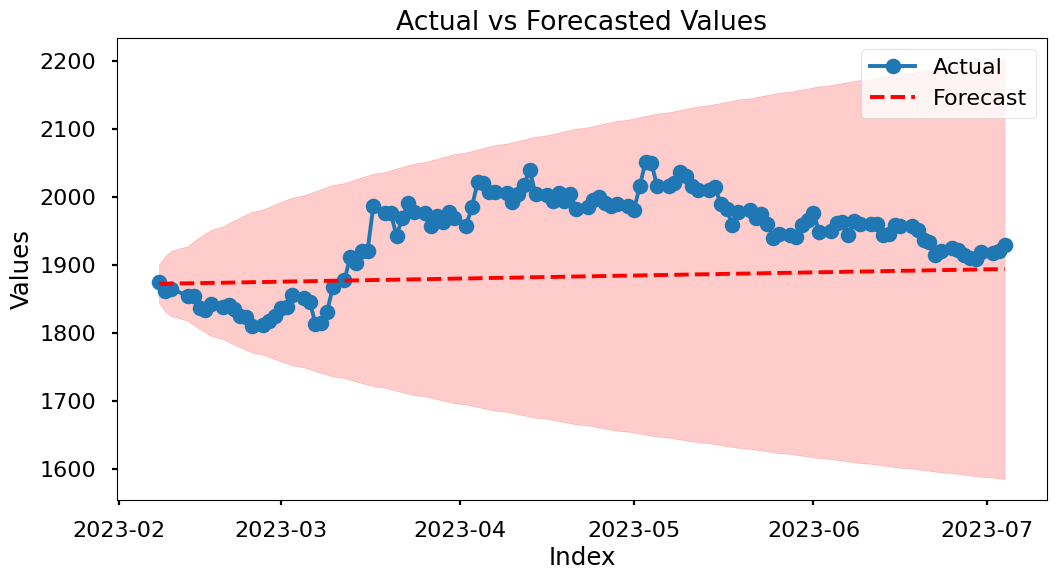

               Forecast   Actual     Lower_CI     Upper_CI
Index                                                     
2023-02-08  1872.652243  1874.97  1844.323106  1900.981380
2023-02-09  1872.199149  1862.23  1832.056474  1912.341823
2023-02-10  1872.864451  1865.28  1825.231233  1920.497669
2023-02-13  1873.038384  1854.34  1817.979183  1928.097584
2023-02-14  1873.212316  1854.94  1811.615988  1934.808644
...                 ...      ...          ...          ...
2023-06-29  1893.388500  1908.76  1589.653764  2197.123235
2023-06-30  1893.562432  1919.20  1588.574922  2198.549943
2023-07-02  1893.736365  1917.70  1587.501204  2199.971525
2023-07-03  1893.910297  1921.17  1586.432549  2201.388046
2023-07-04  1894.084230  1929.65  1585.368896  2202.799565

[125 rows x 4 columns]


In [ ]:
forecast, confidence_int = model.predict(n_periods=len(test_data), return_conf_int=True)

# Create a DataFrame for forecasted values
forecast_df = pd.DataFrame(forecast, columns=['Forecast'])
forecast_df['Index'] = test_data.index
forecast_df = forecast_df.set_index('Index')

# Add actual values to the DataFrame
forecast_df['Actual'] = test_data

# Optional: Add confidence intervals to the DataFrame if available
if confidence_int is not None:
    lower_bound, upper_bound = confidence_int.T
    forecast_df['Lower_CI'] = lower_bound
    forecast_df['Upper_CI'] = upper_bound

# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(forecast_df.index, forecast_df['Actual'], label='Actual', marker='o')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', linestyle='dashed', color='red')
# Optional: Plot confidence intervals
if confidence_int is not None:
    plt.fill_between(forecast_df.index, forecast_df['Lower_CI'], forecast_df['Upper_CI'], color='red', alpha=0.2)
plt.title('Actual vs Forecasted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

# Display the forecast DataFrame
print(forecast_df)

<Axes: >

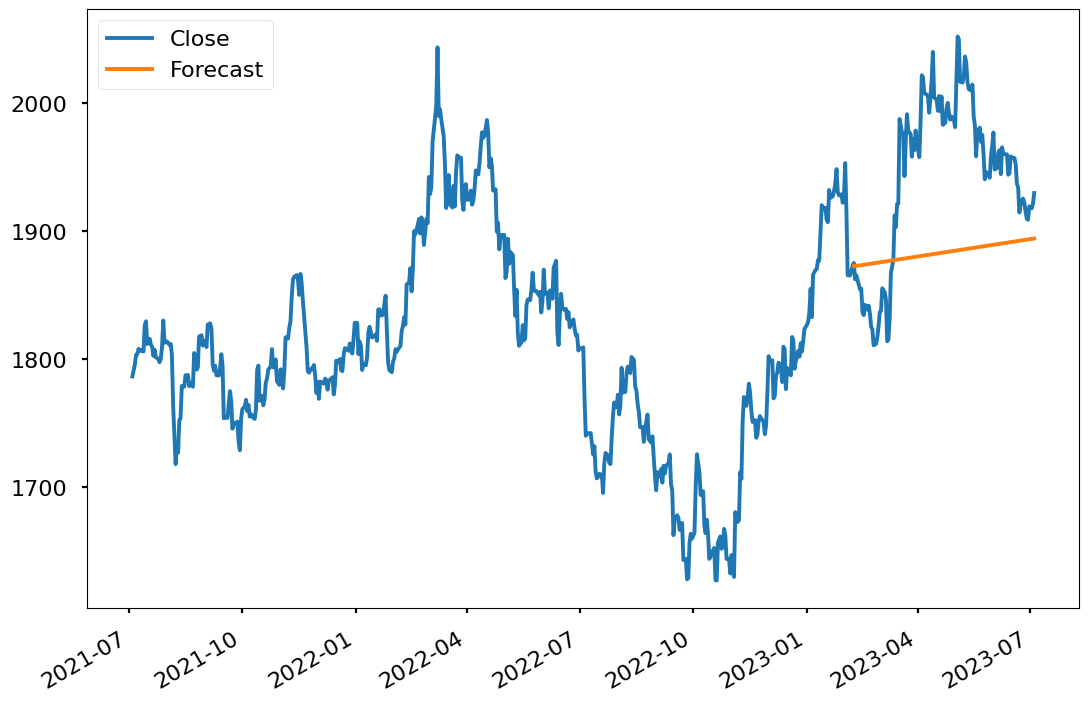

In [ ]:
pd.concat([df['Close'],forecast_df['Forecast']],axis=1).plot()

#**Prediction**

In [ ]:
import statsmodels.api as sm

test_data_copy=test_data.copy()
Control=len(test_data) #breaking for by this parameter
ActualList=[]  #Actual list for storing actual values
PredictList=[] #predict list for storing predict values

model = sm.tsa.ARIMA(train_data, order=(0,1,3))
results = model.fit()
forecast = results.forecast(steps=1)

PredictList.append(forecast.iloc[0])          #adding forcast to predict list
ActualList.append(test_data[0])       #adding first Actual value from test serie

for date, value in test_data.iteritems():

    train_data.loc[date] = value #adding the predicted value to train series
    test_data = test_data.iloc[1:] #Remove the first row of the Series
    # Create the ARIMA(0,1,3) model object
    model = sm.tsa.ARIMA(train_data, order=(0,1,3))
    results = model.fit() # Fit the model to the data

    #forcast
    forecast = results.forecast(steps=1)
    PredictList.append(forecast.iloc[0])          #adding forcast to predict list
    ActualList.append(test_data[0])       #adding first Actual value from test serie

    if len(PredictList)==Control:
        break

In [ ]:
df_predict = pd.DataFrame({'Actual': ActualList, 'Predict': PredictList})
df_predict = df_predict.set_index(test_data_copy.index)
df_predict

,Actual,Predict
Date,,
2023-02-08,1874.97,1872.473767
2023-02-09,1862.23,1874.349918
2023-02-10,1865.28,1862.436430
2023-02-13,1854.34,1866.671514
2023-02-14,1854.94,1853.176032
...,...,...
2023-06-29,1908.76,1910.106526
2023-06-30,1919.20,1909.250137
2023-07-02,1917.70,1919.311677


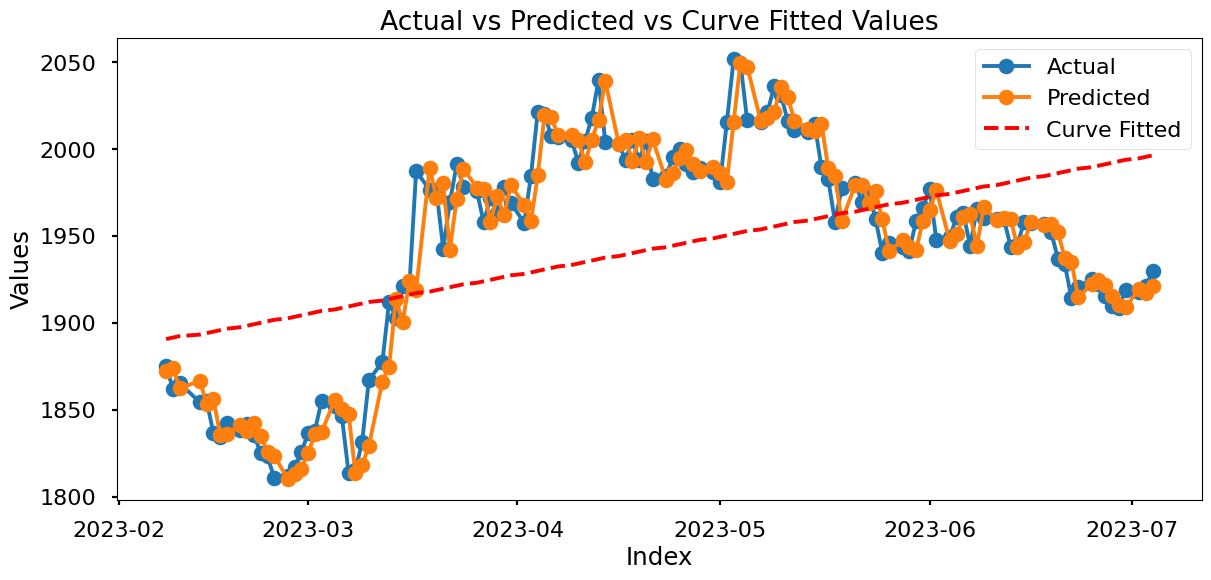

In [ ]:
from scipy.optimize import curve_fit

def curve_fit_function(x, a, b):
    return a * x + b  # You can replace this with the desired curve-fitting function

# Convert datetime index to numerical values
x_values_numeric = range(len(df_predict.index))

# Extract actual and predicted values
y_actual = df_predict['Actual']
y_predict = df_predict['Predict']

# Perform curve fitting
params, covariance = curve_fit(curve_fit_function, x_values_numeric, y_predict)

# Generate curve-fitted values
curve_fitted_values = curve_fit_function(x_values_numeric, *params)

# Plot actual, predicted, and curve-fitted values
plt.figure(figsize=(14, 6))
plt.plot(df_predict.index, y_actual, label='Actual', marker='o')
plt.plot(df_predict.index, y_predict, label='Predicted', marker='o')
plt.plot(df_predict.index, curve_fitted_values, label='Curve Fitted', linestyle='dashed', color='red')
plt.title('Actual vs Predicted vs Curve Fitted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()


In [ ]:
# Display the DataFrame with actual and predicted values
print(df_predict)

             Actual      Predict
Date                            
2023-02-08  1874.97  1872.473767
2023-02-09  1862.23  1874.349918
2023-02-10  1865.28  1862.436430
2023-02-13  1854.34  1866.671514
2023-02-14  1854.94  1853.176032
...             ...          ...
2023-06-29  1908.76  1910.106526
2023-06-30  1919.20  1909.250137
2023-07-02  1917.70  1919.311677
2023-07-03  1921.17  1916.972159
2023-07-04  1929.65  1921.212343

[125 rows x 2 columns]


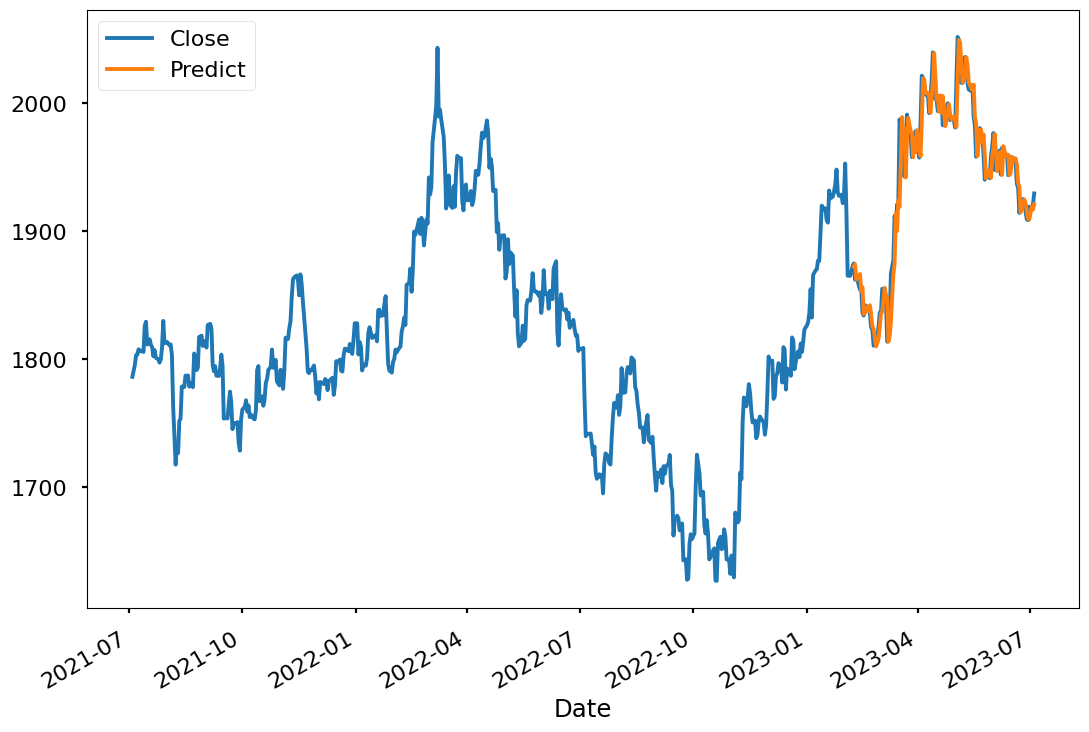

In [ ]:
combined_df = pd.concat([df['Close'],df_predict['Predict']],axis=1).plot()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate AFER
afer = np.abs(df_predict['Actual'] - df_predict['Predict'])

# Calculate the mean squared error
mse = mean_squared_error(df_predict['Actual'], df_predict['Predict'])

# Calculate the R-squared score
r2 = r2_score(df_predict['Actual'], df_predict['Predict'])

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(df_predict['Actual'], df_predict['Predict']))

# Print the results
print('Mean Squared Error:', mse)
print('R-squared Score:', r2)
print('AFER: ',afer)
print('RMSE: ',rmse)

Mean Squared Error: 247.84393787535282
R-squared Score: 0.938045753022214
AFER:  Date
2023-02-08     2.496233
2023-02-09    12.119918
2023-02-10     2.843570
2023-02-13    12.331514
2023-02-14     1.763968
                ...    
2023-06-29     1.346526
2023-06-30     9.949863
2023-07-02     1.611677
2023-07-03     4.197841
2023-07-04     8.437657
Length: 125, dtype: float64
RMSE:  15.743059990845262
